In [79]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [80]:
data = pd.read_csv('winequality.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [81]:
# Identifying Null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

C:\Users\varsh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

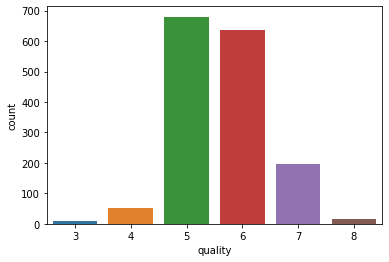

In [82]:
sns.countplot(data['quality'])

In [83]:
x = data.drop(columns= ['total sulfur dioxide','quality'])
y = data['quality']
y.value_counts() #Over Sampling

5    680
6    636
7    198
4     52
8     17
3      9
Name: quality, dtype: int64

In [84]:
# Class Imbalncement

# Under sampling is thing that we reduce the length of the majority class
# Over sampling is thing that we increase the length of the minority class

In [85]:
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)    

In [86]:
y.value_counts()

5    680
6    680
7    680
4    680
8    680
3    680
Name: quality, dtype: int64

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [88]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [89]:
a = data['alcohol']
a = np.array(a)
print(np.amin(a),np.amax(a))

8.4 14.9


In [90]:
# model = RandomForestClassifier(n_estimators=6,criterion="entropy",max_depth=10)
# model = RandomForestClassifier(n_estimators=50,criterion="gini",max_depth=8)
# model = RandomForestClassifier(n_estimators=60,criterion="gini",max_depth=10)
model = RandomForestClassifier(n_estimators=30,criterion="entropy",max_depth=12)

model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9972426470588235, 0.8639705882352942)

In [91]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.8063725490196079)

In [92]:
# arr = pd.DataFrame(columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#        'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
#        'alcohol'])
# arr.loc[0] = [7.7,0.26,0.26,2.0,0.052000000000000005,19.0,77.0,3.15,0.79,10.9]
# model.predict(arr)

inp_data = (7.7,0.26,0.26,2.0,0.052000000000000005,19.0,0.9951,3.15,0.79,10.9)
inp_arr = np.array(inp_data).reshape(1, -1)
prediction = model.predict(inp_arr)
print(prediction[0])

6


C:\Users\varsh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [93]:
x_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')

In [94]:
import pickle
pickle.dump(model, open('winequality.pkl', 'wb'))